# Оценка динамики новых случаев заболевания COVID-19 для различных стран

Для начала подключим все необходимые библиотеки и считаем данные в таблицу

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
data = pd.read_csv("https://storage.googleapis.com/covid19-open-data/v3/epidemiology.csv")
tmp = pd.DataFrame(data)

Для исследования были выбраны несколько стран: Америка(US), Дания(DK), Россия(RU), Нигер(NE), Украина(UA), Франция(FR), Йемен(YE) и Китай(CN).
Перед этим проверим статистику на содержание разрывов

In [ ]:
print(tmp.isna().sum())

date                          0
location_key                877
new_confirmed             48011
new_deceased             783548
new_recovered           8006108
new_tested              8696098
cumulative_confirmed     196823
cumulative_deceased      974310
cumulative_recovered    7995376
cumulative_tested       8877841
dtype: int64


Получили, что в нужной нам колонке отсутствуют данные по некоторым дням. Надо это учесть. Выделим все необходимые данные в отдельную таблицу для удобства работы и заменим все неизвестные значения на среднее значение ближайших, чтобы они не оказывали большого влияния на статистику

In [ ]:
df = pd.DataFrame({'date': tmp.loc[(tmp['location_key'].notnull()) & (tmp['location_key'].map(lambda name: len(str(name)) == 2)), 'date'], 'country': tmp.loc[(tmp['location_key'].notnull()) & (tmp['location_key'].map(lambda name: len(str(name)) == 2)), 'location_key'], 'new_confirmed': tmp.loc[(tmp['location_key'].notnull()) & (tmp['location_key'].map(lambda name: len(str(name)) == 2)), 'new_confirmed']}) 
for country in df['country'].unique():
  df.loc[(df['country'] == country), 'new_confirmed'] = df.loc[(df['country'] == country), 'new_confirmed'].interpolate(method='nearest')

Рассмотрим статистику всех выбранных стран:

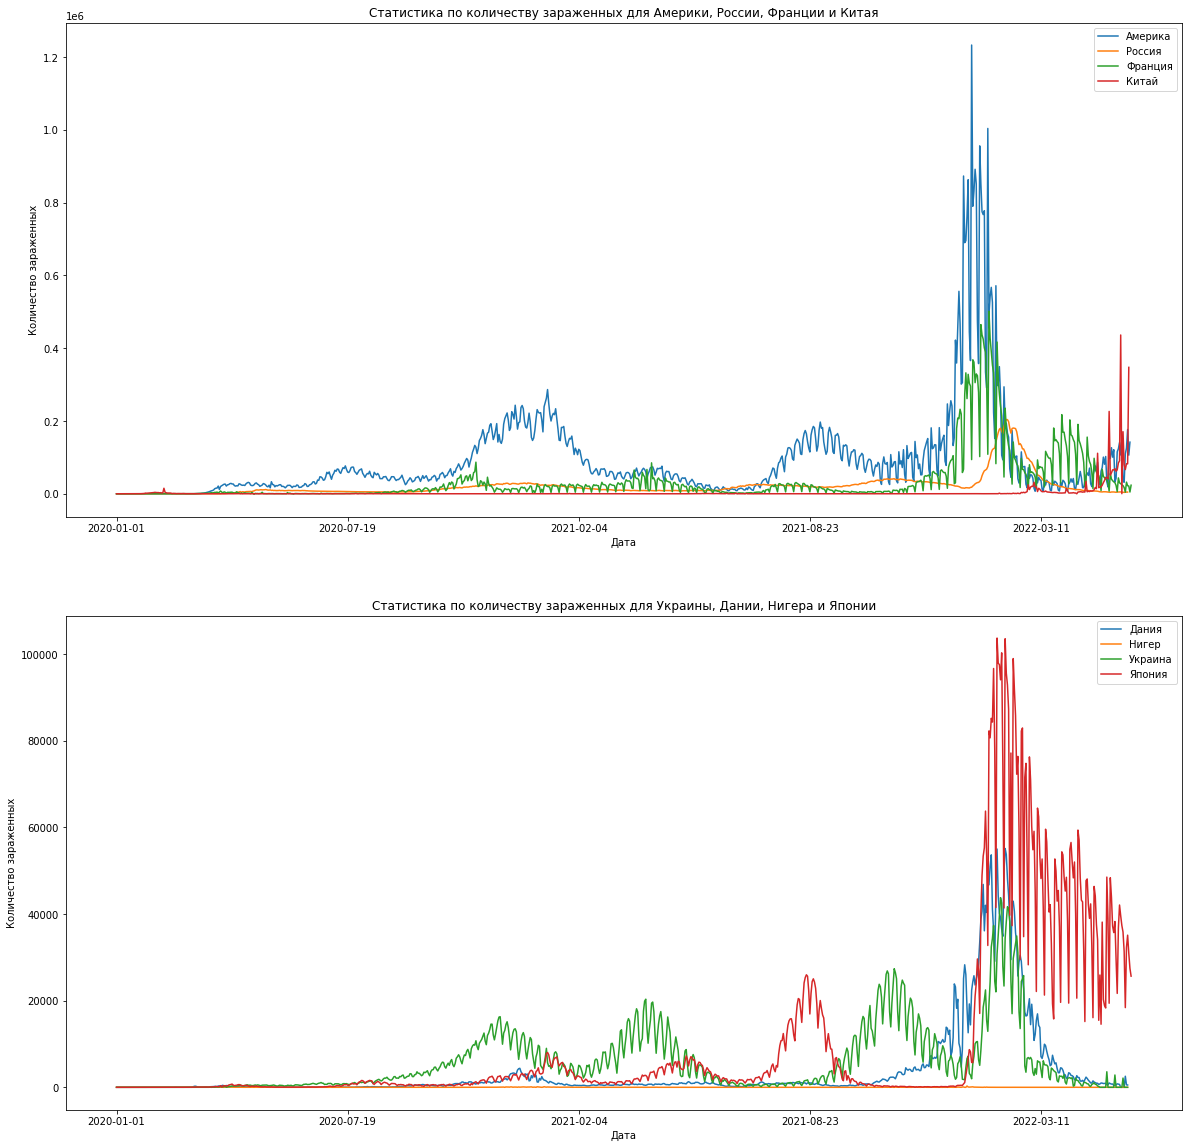

In [ ]:
date1, date2 = df['date'].iloc[0], df['date'].iloc[df['date'].size - 1]
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 20))
df.loc[(df['country'] == 'US') & (df['date'] >= date1) & (df['date'] <= date2)].plot(x='date', y='new_confirmed', ax=axes[0], xlabel='Дата', ylabel='Количество зараженных', title='Статистика по количеству зараженных для Америки, России, Франции и Китая', label='Америка')
df.loc[(df['country'] == 'DK') & (df['date'] >= date1) & (df['date'] <= date2)].plot(x='date', y='new_confirmed', ax=axes[1], xlabel='Дата', ylabel='Количество зараженных', title='Статистика по количеству зараженных для Украины, Дании, Нигера и Японии', label='Дания')
df.loc[(df['country'] == 'RU') & (df['date'] >= date1) & (df['date'] <= date2)].plot(x='date', y='new_confirmed', ax=axes[0], xlabel='Дата', ylabel='Количество зараженных', title='Статистика по количеству зараженных для Америки, России, Франции и Китая', label='Россия')
df.loc[(df['country'] == 'NE') & (df['date'] >= date1) & (df['date'] <= date2)].plot(x='date', y='new_confirmed', ax=axes[1], xlabel='Дата', ylabel='Количество зараженных', title='Статистика по количеству зараженных для Украины, Дании, Нигера и Японии', label='Нигер')
df.loc[(df['country'] == 'UA') & (df['date'] >= date1) & (df['date'] <= date2)].plot(x='date', y='new_confirmed', ax=axes[1], xlabel='Дата', ylabel='Количество зараженных', title='Статистика по количеству зараженных для Украины, Дании, Нигера и Японии', label='Украина')
df.loc[(df['country'] == 'FR') & (df['date'] >= date1) & (df['date'] <= date2)].plot(x='date', y='new_confirmed', ax=axes[0], xlabel='Дата', ylabel='Количество зараженных', title='Статистика по количеству зараженных для Америки, России, Франции и Китая', label='Франция')
df.loc[(df['country'] == 'JP') & (df['date'] >= date1) & (df['date'] <= date2)].plot(x='date', y='new_confirmed', ax=axes[1], xlabel='Дата', ylabel='Количество зараженных', title='Статистика по количеству зараженных для Украины, Дании, Нигера и Японии', label='Япония')
df.loc[(df['country'] == 'CN') & (df['date'] >= date1) & (df['date'] <= date2)].plot(x='date', y='new_confirmed', ax=axes[0], xlabel='Дата', ylabel='Количество зараженных', title='Статистика по количеству зараженных для Америки, России, Франции и Китая', label='Китай')



Можно заметить, что количество новых зараженных в Америке в начале 2022 года сильно больше, чем наивысшие показатели среди других стран за всё время. Это можно объяснить высокой активностью людей во время новогодних праздников. Самым близким к ней по количеству является Франция. Целых 600000 новых заражений за день. Также, на первом графике представлены Россия и Китай - обе не слишком выделялись, но в начале года количество заражений сильно возросло.
На втором же графике представлены страны с сильно меньшим населением, чем у первой четверки, за исключением Японии - она попала сюда за счёт низких показателей заболеваний. Но всё же, благодаря большому количеству жителей, Япония обгоняет остальные 3 страны по количеству заражений, пик которых пришёлся на приблизительно конец 2021 года. У остальной тройки сценарии схожи: небольшие возрастания до 20000 заболеваний во время 2021 года и резкий скачок до 40000 в начале 2022 года.

Также, при наличии кода страны можно посмотреть на её статистику

Статистику какой страны вы хотите посмотреть?
CN
Показать всю статистику? [y/n]
y


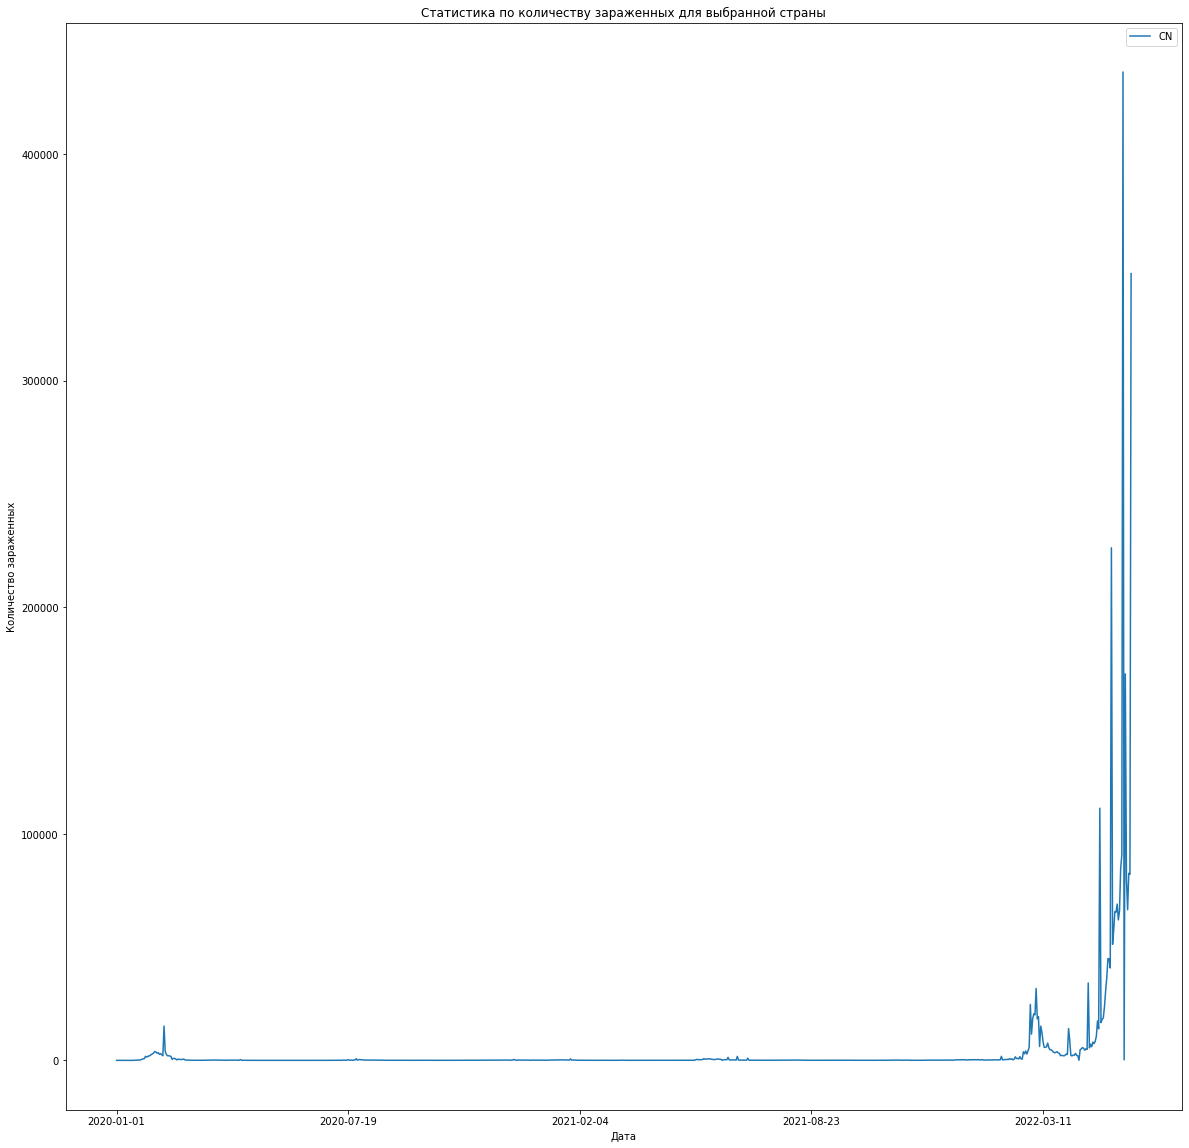

In [ ]:
print("Статистику какой страны вы хотите посмотреть?")
country = str(input())
print("Показать всю статистику? [y/n]")
flag = input()
date1, date2 = df['date'].iloc[0], df['date'].iloc[df['date'].size - 1]
if flag == 'n':
  print("Введите промежуток, за который хотите узнать статистику")
  date1, date2 = map(str, input().split())

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
df.loc[(df['country'] == country) & (df['date'] >= date1) & (df['date'] <= date2)].plot(x='date', y='new_confirmed', ax=axes, xlabel='Дата', ylabel='Количество зараженных', title='Статистика по количеству зараженных для выбранной страны', label=country)


# Оценка длины каждой волны для различных стран


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
from scipy.signal import argrelextrema

In [ ]:
df = pd.read_csv("https://storage.googleapis.com/covid19-open-data/v3/epidemiology.csv")
df = df.set_index('date')

In [ ]:
def waves_Stat(name):
  data = df[(df['location_key'] == name) & (df['new_confirmed'].notna())]['new_confirmed']

  peaks, _ = find_peaks(data,width=1,distance = 30) # индексы локальных максимумов
  ilocs_min = argrelextrema(data[data != 0].values, np.less_equal,order=30)[0] # индексы локальных минимумов

  bottoms = data[ilocs_min] # данные, соответствующие локальным минимумам
  bottoms = bottoms.drop(bottoms[(bottoms == 0)].index[: bottoms[(bottoms == 0)].index.shape[0]-1]) # удаляем начальные нулевые элементы, если их несколько
  
  tops = data[peaks] # данные, соответствующие локальным максимумам


  plt.subplots(figsize=(20, 10))

  data.plot() # отображаем все данные по зараженным

  plt.plot(peaks, data[peaks], "v") # отображаем локальные максимумы
 
  plt.plot(ilocs_min+data[data == 0].shape[0],data[ilocs_min+data[data == 0].shape[0]],"^") # отображаем локальные минимумы

  plt.title(name, fontsize=10)

  plt.show()

  waves = tops.combine(bottoms, max,fill_value = 0) # комбинируем данные
  #waves = waves[(waves == waves[0]) | ((np.abs(waves.shift(-1) - waves) > 3000) & (np.abs(waves.shift(1) - waves) > 3000)) | (waves == waves[waves.shape[0]-1])]
  waves = pd.DataFrame(waves)
  display(waves) # По данному dataframe можно рассмотреть волны и даты, в которые они приблизительно начались/закончились



Рассматривая первую четверку стран, можно заметить, что продолжительность период, в отличие от их высоты, у них примерно совпадают. Немного выбивается Франция в марте 2022, формируя одну обособленную волну. Также в Китае, с их принятыми серьезными мерами, уверенно не поднималась заболеваемость вплоть до марта 2022.

По второй четверке тоже можно утверждать о схожих длительностях подъемов и спусков. Однако Нигер "вышел сухим из воды", практически не показав всплесков заболеваемости на всём промежутке. Думаю, это обусловленно малым человеческим трафиком.

Можно сделать вывод, что волны заболеваемости накрывали почти одновременно все страны и "уходили" тоже примерно в одно время. Все страны были накрыты большой волной коронавируса в начале 2022, достигнув рекордов по заболеваемости за сутки. 
Грубо говоря, болеют в одном месте - болеют везде

Анализ волн в интересующей стране. Для примера можно рассмотреть следующие страны: Россия(RU), Америка(US), Бразилия(BR), Дания(DK), Украина(UA), Франция(FR), Германия(DE), Йемен(YE), Нигер(NE) и Китай(CN)

In [ ]:
print("Введите код страны: ")
country = input()
waves_Stat(country)

На полученном графике можно рассмотреть волны заболеваемости. На выведенных данных представлена примерная выборка с локальными экстремумами заболеваемости, соответствующие им даты 

# Динамика смертности

Выделим необходимую информацию в отдельную таблицу для удобства работы. Перед этим устраним разрывы в статистике

In [ ]:
df = pd.DataFrame({'date': tmp.loc[(tmp['location_key'].notnull()) & (tmp['location_key'].map(lambda name: len(str(name)) == 2)), 'date'], 'country': tmp.loc[(tmp['location_key'].notnull()) & (tmp['location_key'].map(lambda name: len(str(name)) == 2)), 'location_key'], 'new_deceased': tmp.loc[(tmp['location_key'].notnull()) & (tmp['location_key'].map(lambda name: len(str(name)) == 2)), 'new_deceased']})
for country in df['country'].unique():
  df.loc[(df['country'] == country), 'new_deceased'] = df.loc[(df['country'] == country), 'new_deceased'].interpolate(method='nearest')

Для исследования динамики смертности были выбраны те же страны, что и для динамики новых заболеваний.

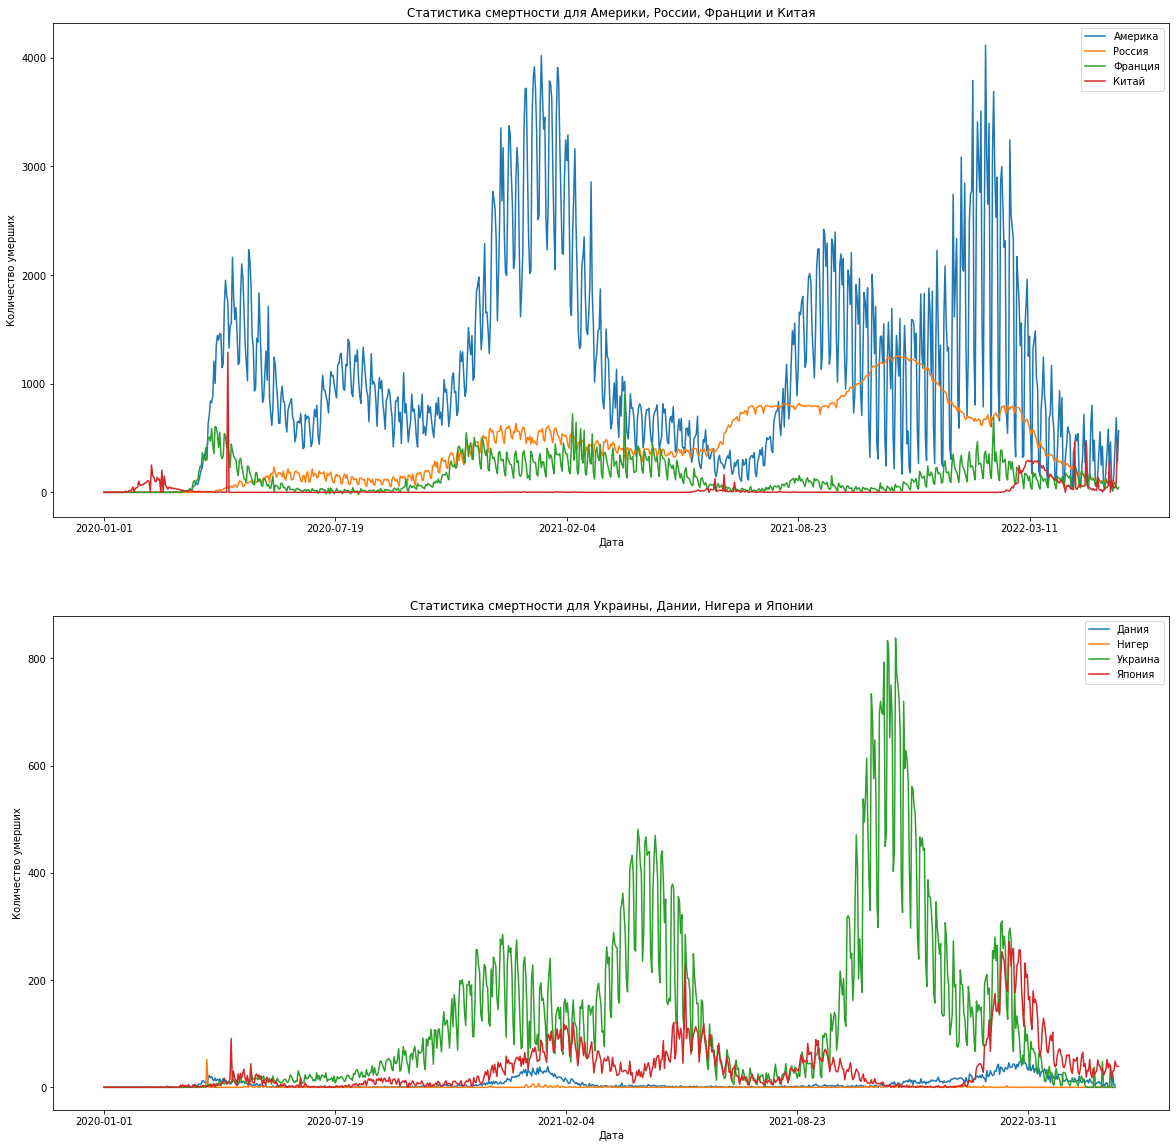

In [ ]:
date1, date2 = df['date'].iloc[0], df['date'].iloc[df['date'].size - 1]
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 20))
df.loc[(df['country'] == 'US') & (df['date'] >= date1) & (df['date'] <= date2)].plot(x='date', y='new_deceased', ax=axes[0], xlabel='Дата', ylabel='Количество умерших', title='Статистика смертности для Америки, России, Франции и Китая', label='Америка')
df.loc[(df['country'] == 'DK') & (df['date'] >= date1) & (df['date'] <= date2)].plot(x='date', y='new_deceased', ax=axes[1], xlabel='Дата', ylabel='Количество умерших', title='Статистика смертности для Украины, Дании, Нигера и Японии', label='Дания')
df.loc[(df['country'] == 'RU') & (df['date'] >= date1) & (df['date'] <= date2)].plot(x='date', y='new_deceased', ax=axes[0], xlabel='Дата', ylabel='Количество умерших', title='Статистика смертности для Америки, России, Франции и Китая', label='Россия')
df.loc[(df['country'] == 'NE') & (df['date'] >= date1) & (df['date'] <= date2)].plot(x='date', y='new_deceased', ax=axes[1], xlabel='Дата', ylabel='Количество умерших', title='Статистика смертности для Украины, Дании, Нигера и Японии', label='Нигер')
df.loc[(df['country'] == 'UA') & (df['date'] >= date1) & (df['date'] <= date2)].plot(x='date', y='new_deceased', ax=axes[1], xlabel='Дата', ylabel='Количество умерших', title='Статистика смертности для Украины, Дании, Нигера и Японии', label='Украина')
df.loc[(df['country'] == 'FR') & (df['date'] >= date1) & (df['date'] <= date2)].plot(x='date', y='new_deceased', ax=axes[0], xlabel='Дата', ylabel='Количество умерших', title='Статистика смертности для Америки, России, Франции и Китая', label='Франция')
df.loc[(df['country'] == 'JP') & (df['date'] >= date1) & (df['date'] <= date2)].plot(x='date', y='new_deceased', ax=axes[1], xlabel='Дата', ylabel='Количество умерших', title='Статистика смертности для Украины, Дании, Нигера и Японии', label='Япония')
df.loc[(df['country'] == 'CN') & (df['date'] >= date1) & (df['date'] <= date2)].plot(x='date', y='new_deceased', ax=axes[0], xlabel='Дата', ylabel='Количество умерших', title='Статистика смертности для Америки, России, Франции и Китая', label='Китай')



Смотря на графики, можно заметить, что Америка так же имеет большой уровень смертности по сравнению с другими рассматриваемыми странами, который достигает отметки больше 4000 в начале 2022 года. Франция и Китай, несмотря на большое количество новых заболеваний, не отличается такими же показателями по уровню смертности от COVID-19. Наиболее спокойно себя ведут значения у Франции: за всё время количество умерших в один день людей не достигло отметки выше 500. 
На втором графике представлены страны с меньшей населенностью, что сказывается и на показателях: Украина, хоть и имея достаточно нестабильный график, имеет максимум примерно 800 смертей от COVID-19 за всё время. Стабильностью отличились страны Нигер и Дания: по сравнению с остальными они лучше всего справились с трудными временами. Также, при наличии большого количества проживающих людей на территории Японии, скачки в количестве смертей в ней достигали максимум 200

# Снижалось ли число новых случаев с ростом вакцинации, снижалось ли число смертей с ростом вакцинации?

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fileEpd = pd.read_csv("https://storage.googleapis.com/covid19-open-data/v3/epidemiology.csv")
fileVac = pd.read_csv("https://storage.googleapis.com/covid19-open-data/v3/vaccinations.csv")

In [ ]:
def Show_Confirms(country):

  dfe = pd.DataFrame(data = fileEpd)
  dfv = pd.DataFrame(data = fileVac)


  dfe = dfe[(dfe['location_key'].map(lambda name: str(name)[:2]) == country) & (dfe['location_key'] == country)]
  dfv = dfv[(dfv['location_key'].map(lambda name: str(name)[:2]) == country) & (dfv['location_key'] == country)]

  dfe = dfe.dropna(axis='index', how='any',subset=['new_confirmed'])
  dfe = dfe.dropna(axis='index', how='any',subset=['cumulative_confirmed'])

  dfv = dfv.dropna(axis='index', how='any',subset=['new_persons_vaccinated'])
  dfv = dfv.dropna(axis='index', how='any',subset=['cumulative_persons_vaccinated'])

  dfe = dfe.set_index('date')
  dfe = dfe.drop(dfe.columns[[2,3,4]], axis = 1)
  dfe = dfe.drop(dfe.columns[3:], axis = 1)

  BV = dfe["2020-02-02":"2020-11-06"]
  AV = dfe["2021-02-02":"2021-11-06"]

  dfv = dfv.set_index('date')
  dfv = dfv.drop(dfv.columns[3:], axis = 1)


  
  new_df  = pd.concat([dfe, dfv], axis=1)
  new_df = new_df.dropna(axis='index', how='any',subset=['new_persons_vaccinated'])
  new_df = new_df.dropna(axis='index', how='any',subset=['cumulative_persons_vaccinated'])
  new_df = new_df.drop(new_df.columns[3], axis = 1)
  new_df.rename(columns = {'new_confirmed' : 'новые заражения', 'cumulative_confirmed' : 'всего зараженных', "new_persons_vaccinated":"новые вакцинации", "cumulative_persons_vaccinated":"всего вакцинированно"}, inplace = True)
  BV.rename(columns = {'new_confirmed' : "новые заражения"}, inplace = True)
  AV.rename(columns = {'new_confirmed' : "новые заражения"}, inplace = True)

  BV.plot(figsize=(20, 10), y=["новые заражения"],title = "Динамика новых случаев до начала вакцинаций ("+country+")")
  plt.show()

  AV.plot(figsize=(20, 10), y=["новые заражения"],title = "Динамика новых случаев после начала вакцинаций ("+country+")")
  plt.show()

  new_df.plot(figsize=(20, 10), y=["новые заражения","новые вакцинации"],title = "Динамика новых случаев ("+country+")")
  plt.show()

  new_df.plot(figsize=(20, 10), y=["всего зараженных", "всего вакцинированно"],title = "Всего, с момента первой вакцинации ("+country+")")
  plt.show()



  plt.figure(figsize=(20, 10))

  plt.subplot(2, 2, 1)
  plt.plot(new_df.index, new_df["новые заражения"])
  plt.title("Новые заражения")
  plt.subplot(2, 2, 2)
  plt.plot(new_df.index, new_df["новые вакцинации"])
  plt.title("Новые вакцинации")
  plt.subplot(2, 2, 3)
  plt.plot(new_df.index, new_df["всего зараженных"])
  plt.title("Всего зараженных")
  plt.subplot(2, 2, 4)
  plt.plot(new_df.index, new_df["всего вакцинированно"])
  plt.title("Всего вакцинированных")

In [ ]:
def Show_Deaths(country):

  dfe = pd.DataFrame(data = fileEpd)
  dfv = pd.DataFrame(data = fileVac)


  dfe = dfe[(dfe['location_key'].map(lambda name: str(name)[:2]) == country) & (dfe['location_key'] == country)]
  dfv = dfv[(dfv['location_key'].map(lambda name: str(name)[:2]) == country) & (dfv['location_key'] == country)]

  dfe = dfe.dropna(axis='index', how='any',subset=['new_deceased'])
  dfe = dfe.dropna(axis='index', how='any',subset=['cumulative_deceased'])

  dfv = dfv.dropna(axis='index', how='any',subset=['new_persons_vaccinated'])
  dfv = dfv.dropna(axis='index', how='any',subset=['cumulative_persons_vaccinated'])

  dfe = dfe.set_index('date')
  dfe = dfe.drop(dfe.columns[[1,3,4,5]], axis = 1)
  dfe = dfe.drop(dfe.columns[3:], axis = 1)

  BV = dfe["2020-02-02":"2020-11-06"]
  AV = dfe["2021-02-02":"2021-11-06"]

  dfv = dfv.set_index('date')
  dfv = dfv.drop(dfv.columns[3:], axis = 1)


  
  new_df  = pd.concat([dfe, dfv], axis=1)
  new_df = new_df.dropna(axis='index', how='any',subset=['new_persons_vaccinated'])
  new_df = new_df.dropna(axis='index', how='any',subset=['cumulative_persons_vaccinated'])
  new_df = new_df.drop(new_df.columns[3], axis = 1)
  new_df.rename(columns = {'new_deceased' : 'новые смерти', 'cumulative_deceased' : 'всего умерло', "new_persons_vaccinated":"новые вакцинации", "cumulative_persons_vaccinated":"всего вакцинированно"}, inplace = True)
  BV.rename(columns = {'new_deceased' : "новые смерти"}, inplace = True)
  AV.rename(columns = {'new_deceased' : "новые смерти"}, inplace = True)

  BV.plot(figsize=(20, 10), y=["новые смерти"],title = "Динамика летальных исходов до начала вакцинаций ("+country+")")
  plt.show()

  AV.plot(figsize=(20, 10), y=["новые смерти"],title = "Динамика летальных исходов после начала вакцинаций ("+country+")")
  plt.show()



  plt.figure(figsize=(20, 10))

  plt.subplot(2, 2, 1)
  plt.plot(new_df.index, new_df["новые смерти"])
  plt.title("Новые заражения")
  plt.subplot(2, 2, 2)
  plt.plot(new_df.index, new_df["новые вакцинации"])
  plt.title("Новые вакцинации")
  plt.subplot(2, 2, 3)
  plt.plot(new_df.index, new_df["всего умерло"])
  plt.title("Всего зараженных")
  plt.subplot(2, 2, 4)
  plt.plot(new_df.index, new_df["всего вакцинированно"])
  plt.title("Всего вакцинированных")

Сравнивая динамику новых заражений или летальных исходов до, и после начала кампании вакцинации, можно подумать, что темпы роста практически не изменились.

Но это не совсем верный вывод о сложившейся ситуации. Сами графики схожи между собой - вид этого паттерна определяется сезонными явлениями (например объявление локдауна или отпускной сезон). Кстати говоря, заметно, что после начала вакцинаций тенденции роста заболеваемости снизились.

На общем графике, можно увидеть, что с момента начала вакцинации темпы роста заболеваемости и смертности снизились.


Важно отметить, здесь речь идет именно о темпах роста, а не об значении прироста.

Введите код страны: 
RU


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


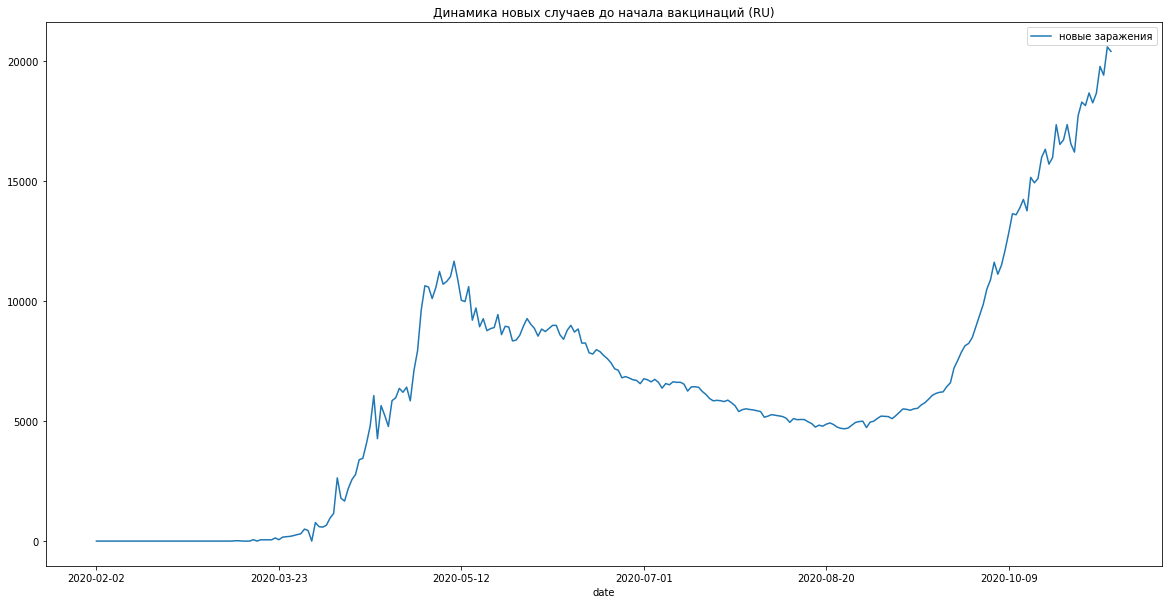

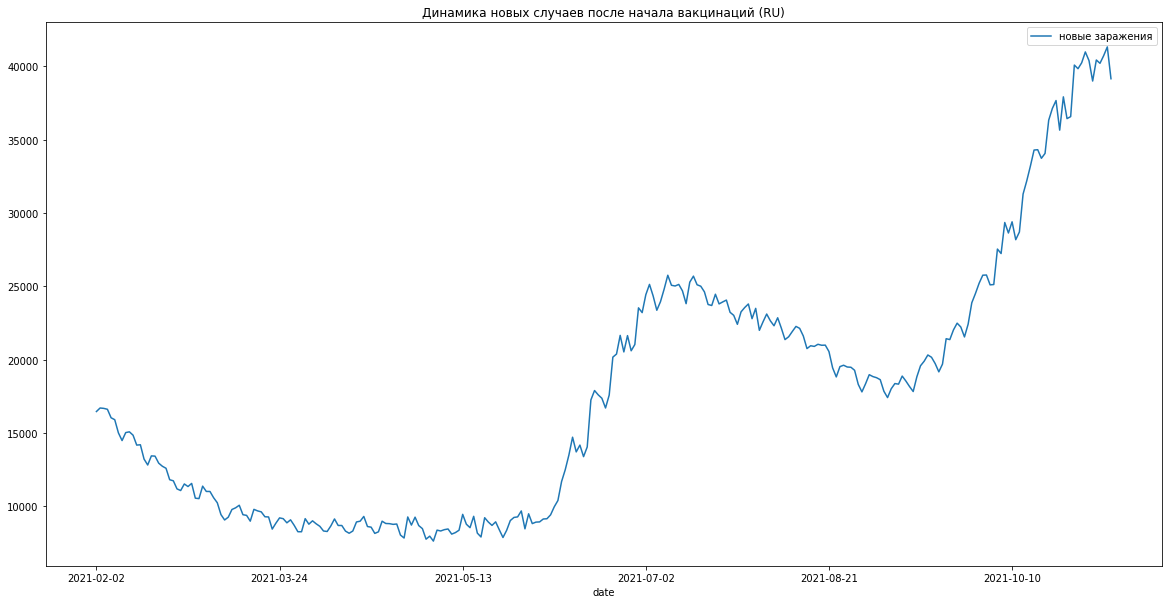

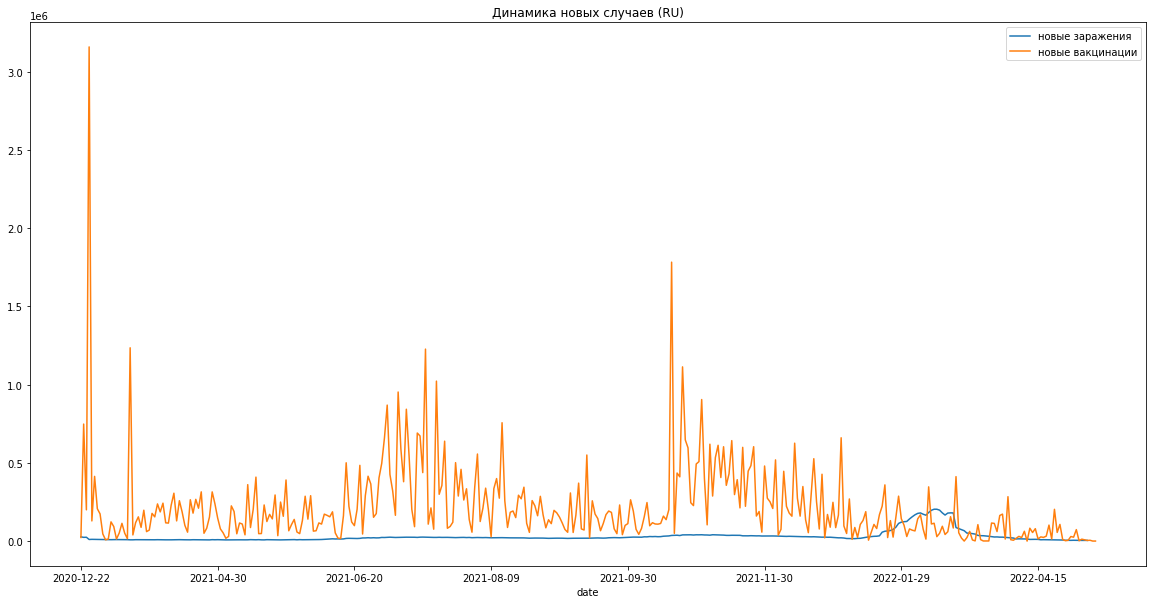

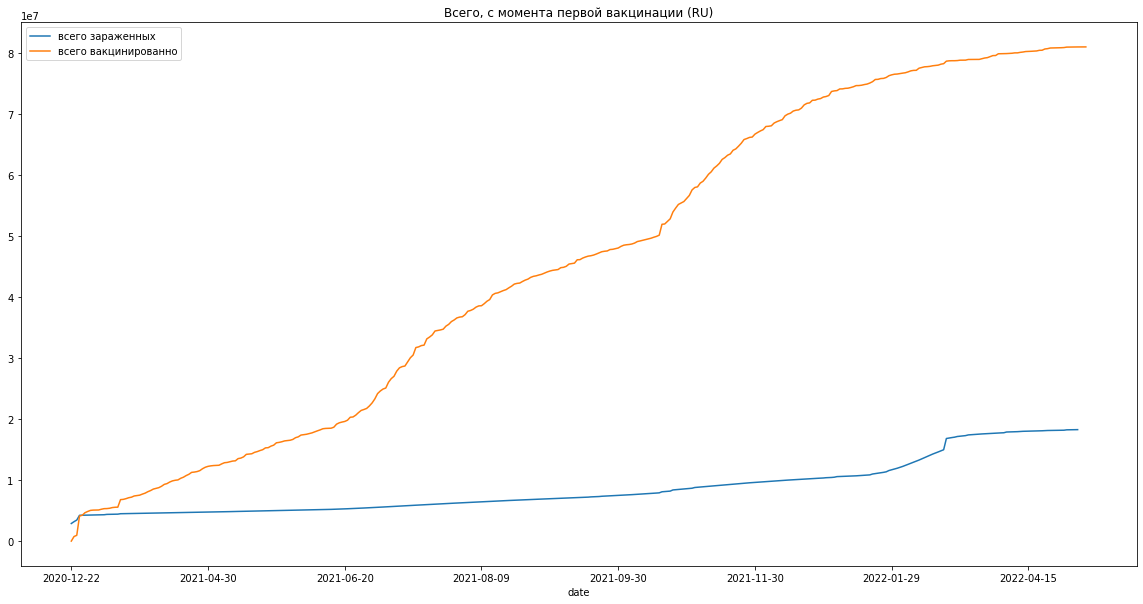

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


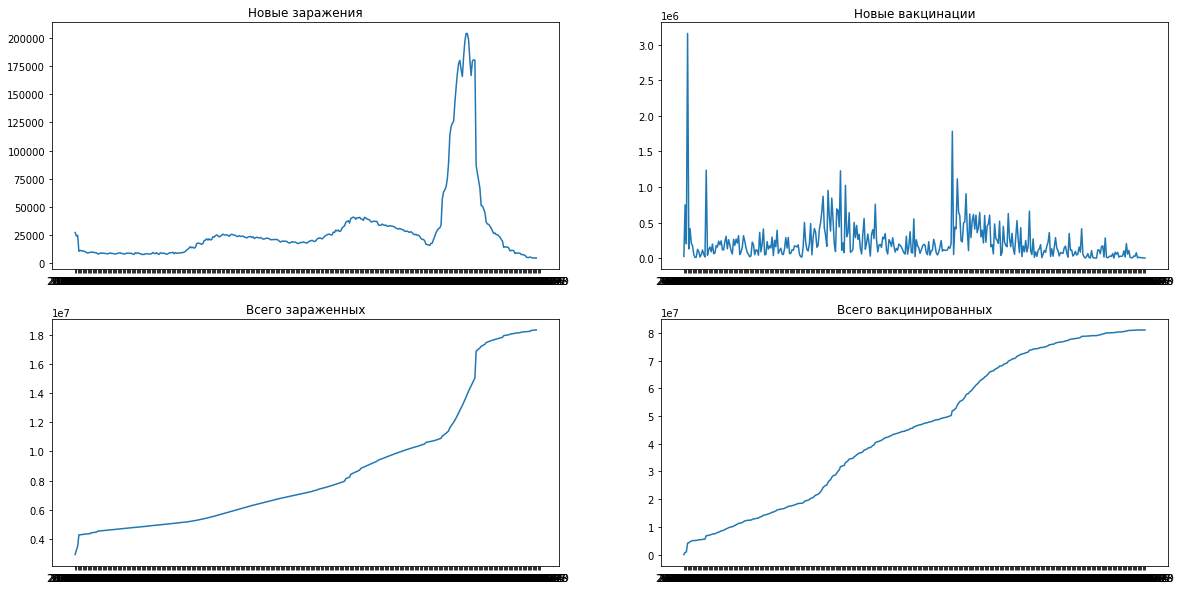

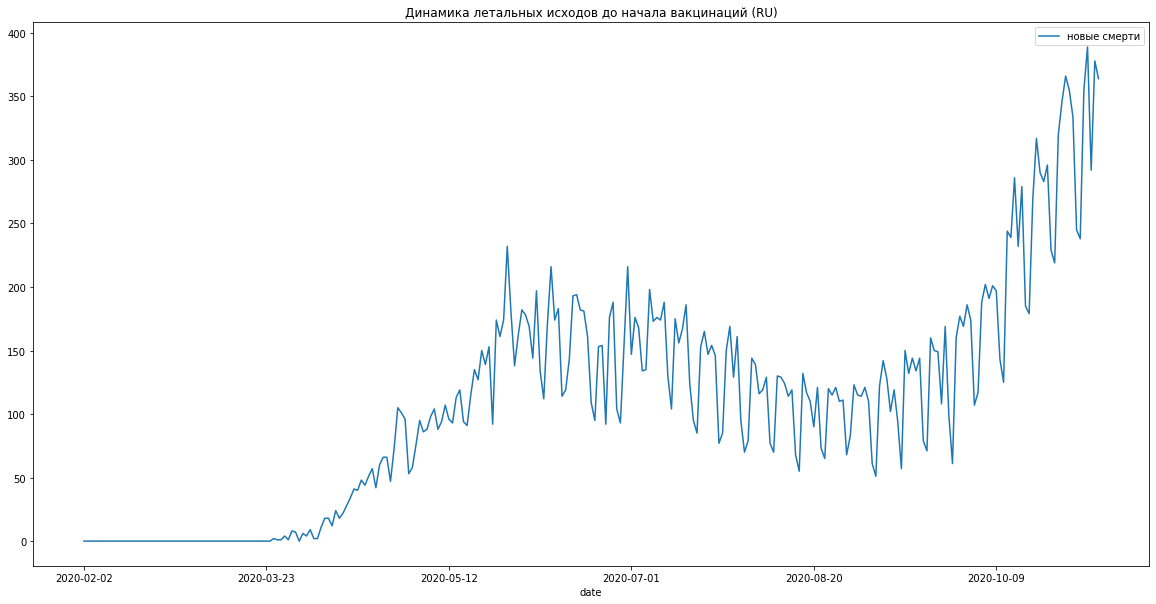

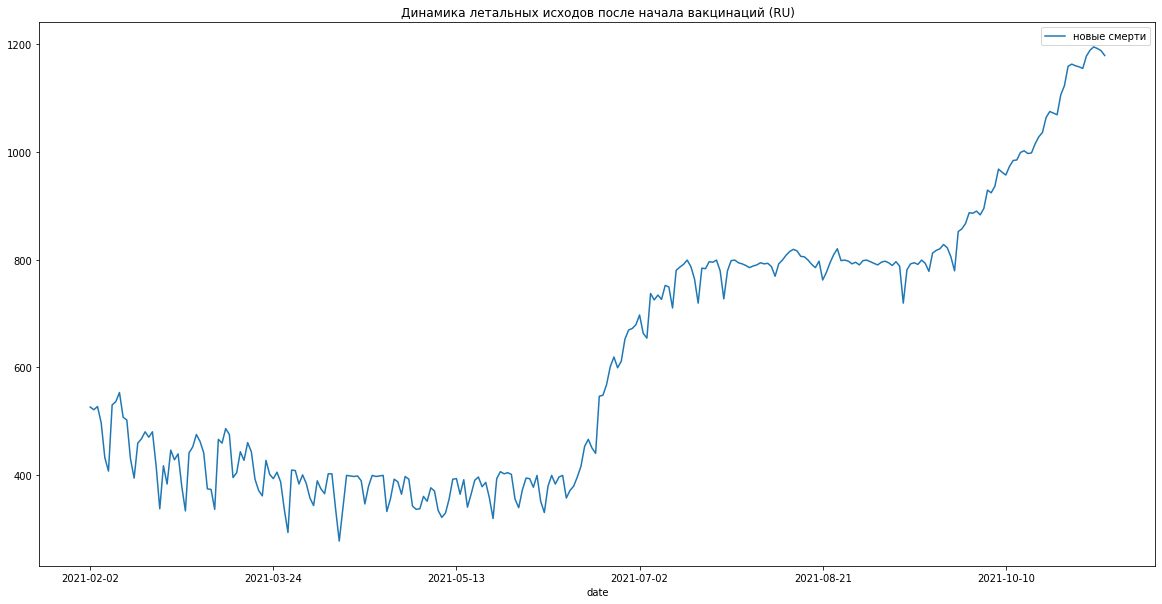

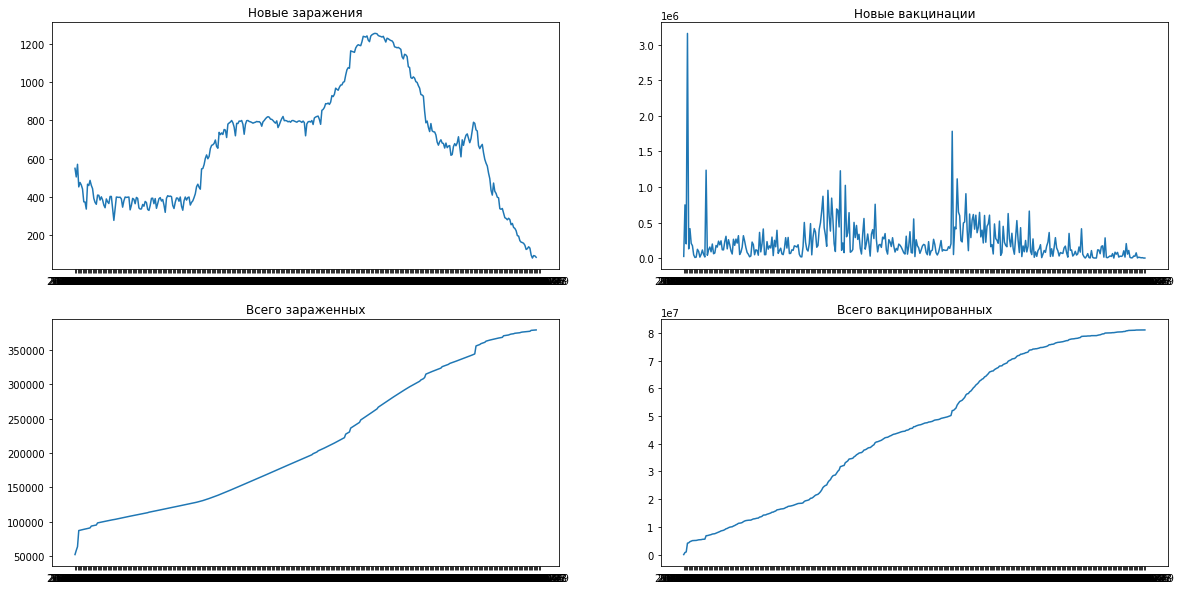

In [ ]:
print("Введите код страны: ")
country = input()
Show_Confirms(country)
Show_Deaths(country)

# В какие времена года чаще всего заболевали люди в России?

In [ ]:
dfseasons = pd.DataFrame({'season': ['winter', 'spring', 'summer', 'autumn'], 'new_confirmed': [0, 0, 0, 0]})
dfseasons.loc[(dfseasons['season'] == 'winter'), 'new_confirmed'] = tmp.loc[(tmp['location_key'].notnull()) & (tmp['location_key'].map(lambda name: str(name)[:2] == 'RU')) & (((tmp['date'] >= '2019-12-01') & (tmp['date'] <= '2020-02-29'))|((tmp['date'] >= '2020-12-01') & (tmp['date'] <= '2021-02-28')) | ((tmp['date'] >= '2021-12-01') & (tmp['date'] <= '2022-02-28'))), 'new_confirmed'].sum()
dfseasons.loc[(dfseasons['season'] == 'spring'), 'new_confirmed'] = tmp.loc[(tmp['location_key'].notnull()) & (tmp['location_key'].map(lambda name: str(name)[:2] == 'RU')) & (((tmp['date'] >= '2020-03-01') & (tmp['date'] <= '2020-05-31'))|((tmp['date'] >= '2021-03-01') & (tmp['date'] <= '2021-05-31')) | ((tmp['date'] >= '2022-03-01') & (tmp['date'] <= '2022-05-31'))), 'new_confirmed'].sum()
dfseasons.loc[(dfseasons['season'] == 'summer'), 'new_confirmed'] = tmp.loc[(tmp['location_key'].notnull()) & (tmp['location_key'].map(lambda name: str(name)[:2] == 'RU')) & (((tmp['date'] >= '2020-06-01') & (tmp['date'] <= '2020-08-31'))|((tmp['date'] >= '2021-06-01') & (tmp['date'] <= '2021-08-31')) | ((tmp['date'] >= '2022-06-01') & (tmp['date'] <= '2022-08-31'))), 'new_confirmed'].sum()
dfseasons.loc[(dfseasons['season'] == 'autumn'), 'new_confirmed'] = tmp.loc[(tmp['location_key'].notnull()) & (tmp['location_key'].map(lambda name: str(name)[:2] == 'RU')) & (((tmp['date'] >= '2020-09-01') & (tmp['date'] <= '2020-11-30'))|((tmp['date'] >= '2021-09-01') & (tmp['date'] <= '2021-11-30')) | ((tmp['date'] >= '2021-09-01') & (tmp['date'] <= '2022-11-30'))), 'new_confirmed'].sum()

   season  new_confirmed
0  winter       12255733
1  spring        4402294
2  summer        4824566
3  autumn       18327241


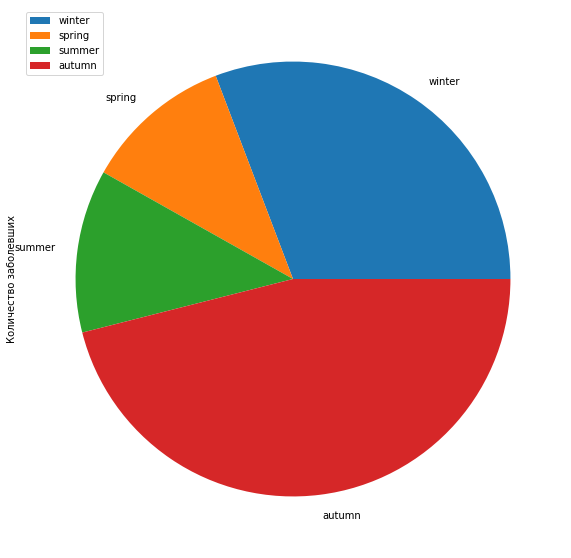

In [ ]:
print(dfseasons.head())

dfseasons.plot(y='new_confirmed', figsize=(10,10), label='Количество заболевших', kind='pie', labels=dfseasons['season'])

Наглядно видно, что среди всех времен года выделяются осень и зима. Действительно, в это время у людей снижается иммунитет: зимой из-за низких температур, а осенью из-за их редких перепадов 